In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

(back to slides)
# Random Selection

In [2]:
groups = make_array('treatment', 'control')
groups

array(['treatment', 'control'],
      dtype='<U9')

Let's randomly assign 1 individual to a control or treatment group

In [15]:
np.random.choice(groups)

'control'

In [ ]:
np.random.choice(groups, 1)

Let's randomly assign 10 individuals to each group

In [20]:
np.random.choice(groups, 10)

array(['treatment', 'treatment', 'treatment', 'control', 'control',
       'treatment', 'control', 'treatment', 'treatment', 'control'],
      dtype='<U9')

In [21]:
assignments = np.random.choice(groups, 10)
assignments == 'treatment', assignments

(array([False,  True, False, False, False, False, False,  True,  True, False], dtype=bool),
 array(['control', 'treatment', 'control', 'control', 'control', 'control',
        'control', 'treatment', 'treatment', 'control'],
       dtype='<U9'))

In [22]:
sum(assignments == 'treatment')

3

In [24]:
Table().with_columns('assignments', assignments == 'treatment')

assignments
False
True
False
False
False
False
False
True
True
False


In [25]:
Table().with_columns('assignments', assignments == 'treatment').where('assignments', True)

assignments
True
True
True


In [23]:
Table().with_columns('assignments', assignments == 'treatment').where('assignments', True).num_rows

3

Let's repeat this

In [26]:
assignments = np.random.choice(groups, 10)
assignments

array(['treatment', 'treatment', 'treatment', 'control', 'control',
       'treatment', 'treatment', 'control', 'treatment', 'treatment'],
      dtype='<U9')

Now 7 people were givewn the treatment

Do we see any differences if we run this again??

In [27]:
assignments_one = np.random.choice(groups, 10)
assignments_one

array(['treatment', 'treatment', 'treatment', 'treatment', 'treatment',
       'treatment', 'treatment', 'treatment', 'control', 'control'],
      dtype='<U9')

Why did we see those differences?

Answer: because `np.random.choice` randmly assigns each indiidual to a treatment or control

In [29]:
np.random.choice(groups), groups

('control',
 array(['treatment', 'control'],
       dtype='<U9'))

back to slides
# Appending arrays: `np.append()`

Adding an individual to a control or treament group

In [31]:
# Make an empty array for the control and treatment groups
control_group = make_array()
treatment_group = make_array()
control_group, treatment_group
len(control_group), len(treatment_group)

(0, 0)

Now let's randomly assign an individual to a group and then add the individual to the corresponding group based on the random assignment

In [34]:
individual = np.random.choice(groups)
individual

'treatment'

In [39]:
if individual == 'treatment':
    np.append(treatment_group, individual)
else:
    np.append(control_group, individual)

In [40]:
len(treatment_group), len(control_group)

(0, 0)

In [41]:
treatment_group

array([], dtype=float64)

In [42]:
np.append(treatment_group, individual)

array(['treatment'],
      dtype='<U32')

In [48]:
control_group = make_array()
treatment_group = make_array()

In [54]:
control_group = make_array()
treatment_group = make_array()
assigned_group =  np.random.choice(groups)
individual = "individual 1"
print(assigned_group)
if assigned_group == 'treatment':
    treatment_group = np.append(treatment_group, individual)
else:
    control_group = np.append(control_group, individual)

control_group, treatment_group

control


(array(['individual 1'],
       dtype='<U32'),
 array([], dtype=float64))

#### Let's put this control statment into a function:
- What should we name the function? 
- What are the arguments/parameters of the function?
- What should the function return?

In [66]:
individual

'individual 1'

In [68]:
def random_assignment(individual, treatment_group, control_group):
    '''add a new individual to our control or treatment group'''
    assigned_group =  np.random.choice(groups)
    #print(assigned_group)
    if assigned_group == 'treatment':
        treatment_group = np.append(treatment_group, individual)
    else:
        control_group = np.append(control_group, individual)
    return treatment_group, control_group

After we write a function we need to test it! If we dont test it, we assume it doesnt work

Now let's call this function 5 times to assign 5 individuals to the different groups

In [70]:
random_assignment("frat boy", treatment_group, control_group)

(array(['frat boy'],
       dtype='<U32'),
 array(['individual 1'],
       dtype='<U32'))

In [71]:
treatment_group = make_array()
control_group = make_array()

In [72]:
random_assignment("frat boy", treatment_group, control_group)

(array([], dtype=float64),
 array(['frat boy'],
       dtype='<U32'))

In [73]:
random_assignment("adam", treatment_group, control_group)

(array(['adam'],
       dtype='<U32'),
 array([], dtype=float64))

In [74]:
treatment_group, control_group

(array([], dtype=float64), array([], dtype=float64))

In [77]:
treatment_group = make_array()
control_group = make_array()

In [78]:
treatment_group, control_group = random_assignment("adam", treatment_group, control_group)
treatment_group, control_group

(array([], dtype=float64),
 array(['adam'],
       dtype='<U32'))

In [79]:
treatment_group, control_group = random_assignment("person 2", treatment_group, control_group)
treatment_group, control_group

(array(['person 2'],
       dtype='<U32'),
 array(['adam'],
       dtype='<U32'))

In [80]:
treatment_group, control_group = random_assignment("person 3", treatment_group, control_group)
treatment_group, control_group

(array(['person 2', 'person 3'],
       dtype='<U32'),
 array(['adam'],
       dtype='<U32'))

In [81]:
treatment_group, control_group = random_assignment("person 4", treatment_group, control_group)
treatment_group, control_group

(array(['person 2', 'person 3', 'person 4'],
       dtype='<U32'),
 array(['adam'],
       dtype='<U32'))

In [82]:
treatment_group, control_group = random_assignment("person 5", treatment_group, control_group)
treatment_group, control_group

(array(['person 2', 'person 3', 'person 4', 'person 5'],
       dtype='<U32'),
 array(['adam'],
       dtype='<U32'))

In [83]:
treatment_group, control_group = random_assignment("person 6", treatment_group, control_group)
treatment_group, control_group

(array(['person 2', 'person 3', 'person 4', 'person 5'],
       dtype='<U32'),
 array(['adam', 'person 6'],
       dtype='<U32'))

We will now see a cleaner way to assign 5 individuals to the different groups
(back to slides)
# `For` Statements

In [84]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [85]:
print('iteration', 0)
print('iteration', 1)
print('iteration', 2)
print('iteration', 3)

iteration 0
iteration 1
iteration 2
iteration 3


In [ ]:
print('iteration', 0)
print('iteration', 1)
print('iteration', 2)
print('iteration', 3)
print('iteration', 4)


In [86]:
for i in np.arange(100):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [88]:
for i in np.arange(1,10,2):
    print('iteration', i)

iteration 1
iteration 3
iteration 5
iteration 7
iteration 9


In [90]:
for i in make_array(1,3,5,7,9):
    print('iteration', i)

iteration 1
iteration 3
iteration 5
iteration 7
iteration 9


In [87]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

Use a `for` loop to assign the individuals to the different groups

In [94]:
treatment_group = make_array()
control_group = make_array()
#treatment_group, control_group = add_individual_to_group(treatment_group, control_group, 0)

In [98]:
"person #" + individual

TypeError: can only concatenate str (not "numpy.int64") to str

cant concatenate this numpy integer with a string, so what should we do?

In [100]:
"person #"  +str(individual)

'person #0'

In [104]:
treatment_group = make_array()
control_group = make_array()
for individual in np.arange(0,100):
    treatment_group, control_group = random_assignment("person #" + str(individual+1), treatment_group, control_group)
treatment_group, control_group

(array(['person #1', 'person #3', 'person #6', 'person #9', 'person #10',
        'person #13', 'person #14', 'person #15', 'person #16',
        'person #18', 'person #20', 'person #21', 'person #24',
        'person #27', 'person #29', 'person #30', 'person #32',
        'person #34', 'person #37', 'person #39', 'person #42',
        'person #43', 'person #44', 'person #45', 'person #46',
        'person #47', 'person #48', 'person #51', 'person #53',
        'person #54', 'person #55', 'person #56', 'person #57',
        'person #59', 'person #64', 'person #65', 'person #66',
        'person #68', 'person #69', 'person #71', 'person #72',
        'person #74', 'person #76', 'person #78', 'person #79',
        'person #80', 'person #82', 'person #85', 'person #87',
        'person #92', 'person #94', 'person #97', 'person #98',
        'person #100'],
       dtype='<U32'),
 array(['person #2', 'person #4', 'person #5', 'person #7', 'person #8',
        'person #11', 'person #12', 'pe

# Heads or Tails Experiment

Let's run 10 experiments where we flip a coin 100 times and see how many times we get heads

Before we begin, let's write out all the steps we need to do

*Hint: Lets work inside out, i.e. lets first write code for one experiment*

1. specify what our options are to randomly select
2. randomly select from our options, i.e. flip a coin 100 times
3. keep track of the selection, i.e. count number of heads we saw

In [106]:
options = make_array('heads', 'tails')
options

array(['heads', 'tails'],
      dtype='<U5')

In [108]:
hundred_flips = np.random.choice(options,100)

In [110]:
sum(hundred_flips)

TypeError: unsupported operand type(s) for +: 'int' and 'numpy.str_'

In [113]:
# checks if a flip was heads or tails
hundred_flips == 'heads'

array([ True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,  True], dtype=bool)

In [115]:
# compute the numbre of heads
sum(hundred_flips == 'heads')

42

### how can we repeat this 10 times?

answer: use a `for` loop

In [116]:
def flip_100_times():
    hundred_flips = np.random.choice(options,100)
    return sum(hundred_flips == 'heads')

In [120]:
flip_100_times()

55

In [121]:
for i in np.arange(10):
    flip_100_times()

but wait, we need to keep track of the results from each 100 coin flips?

In [124]:
results = make_array()
for i in np.arange(1000):
    results = np.append(results, flip_100_times())
results

array([ 49.,  61.,  49.,  57.,  47.,  46.,  38.,  50.,  51.,  52.,  43.,
        52.,  51.,  52.,  53.,  47.,  54.,  48.,  47.,  45.,  55.,  50.,
        42.,  50.,  44.,  54.,  52.,  55.,  49.,  59.,  56.,  47.,  43.,
        46.,  55.,  55.,  55.,  47.,  46.,  50.,  58.,  63.,  46.,  54.,
        39.,  46.,  52.,  53.,  55.,  46.,  52.,  52.,  49.,  56.,  49.,
        51.,  55.,  49.,  53.,  49.,  59.,  45.,  55.,  48.,  47.,  54.,
        46.,  51.,  48.,  47.,  49.,  45.,  52.,  47.,  50.,  53.,  47.,
        52.,  46.,  47.,  50.,  46.,  50.,  55.,  46.,  47.,  50.,  51.,
        56.,  53.,  51.,  49.,  50.,  55.,  40.,  52.,  52.,  47.,  55.,
        48.,  47.,  52.,  51.,  44.,  45.,  42.,  56.,  45.,  43.,  53.,
        50.,  50.,  42.,  56.,  46.,  47.,  46.,  53.,  53.,  53.,  62.,
        56.,  47.,  46.,  51.,  56.,  57.,  47.,  47.,  50.,  65.,  42.,
        53.,  50.,  47.,  51.,  50.,  47.,  52.,  47.,  57.,  48.,  51.,
        52.,  55.,  42.,  53.,  48.,  44.,  48.,  5

In [125]:
num_heads_tbl = Table().with_columns("# heads", results)
num_heads_tbl

# heads
49
61
49
57
47
46
38
50
51
52


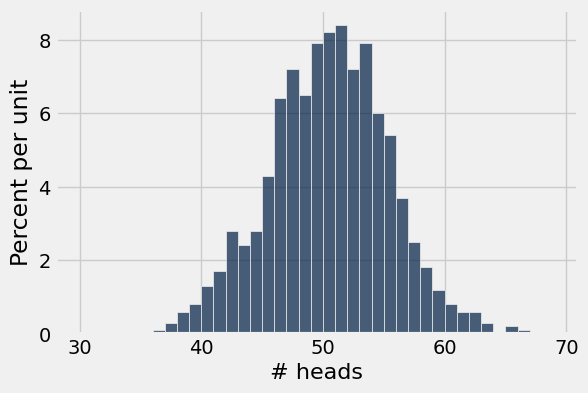

In [126]:
num_heads_tbl.hist(bins=np.arange(30,70,1))

how many times when flipped 100 coins did we get between 40 and 60 heads?

In [129]:
num_heads_tbl.where("# heads", are.between(40,60)).num_rows

956

In [130]:
num_heads_tbl.num_rows

1000

1. make an array of heads and tails
2. flip a coin randomly (select head or tails at random) 
3. keep track of whether we got heads our tails

In [ ]:
coins = make_array('heads', 'tails')
coins

In [ ]:
np.random.choice(coins, 100) 

In [ ]:
sum(np.random.choice(coins, 100) == 'heads')

In [ ]:
num_heads = make_array()
for i in np.arange(1000):
    num_heads = np.append(num_heads, sum(np.random.choice(coins, 100) == 'heads'))
num_heads

Let's plot the results from the experiments. What type of plot should we use?

How many times did we get 40 through 60 heads? What percentage of our simulations do these represent?

In [ ]:
1. Make our coins options

(back to slides)

# Monty Hall Simulation

Lets make an array of what can be behind each door

In [ ]:
goats = make_array('first goat', 'second goat')
hidden_behind_door = ... # Lets add the car

Let's make a choice. We won't choose a door but rather whats behind the door

In [ ]:
# Remember np.random.choice
contestant_choice = ...
contestant_choice

In [ ]:
def other_goat(a_goat):
    ''' Returns the other goat that wasn't chosen
    '''
    ...
    return ...

Let's test `other_goat()`

What happens next? 
Monty chooses the door to show and we have a remaining door

In [ ]:
monty_choice = ...
remaining_door = ...

But remember, these choices are conditioned on what the contestant chose

In [ ]:
if ...: # one option for contest's choice
    ...
elif ...: # second option for contests's choice
    ...
elif ...: # third option for contestants choice
    ...
    
contestant_choice, monty_choice, remaining_door

Let's add this to a function so that we can run many simulations of the game

In [ ]:
def monty_hall():
    '''
    Simulates one run of monty hall.
    Returns values behind contestant_choice, monty_choice, remaining_door
    '''
    ...
    return 

Now let's play this game once

Let's play it another time

#### Let's play this game multiple times
How could we do that based on what we learned in today's lecture?

### Simulations

Let's make a table where we will keep simulations
We want to keep track of the original guess, what was revealed, and what is remaining in the other hidden door

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

### How could we see what remains for each guess?
what metho dshould we call on the table?

Let's group on the remaining to decide if we should change?